In [2]:
# Comparison between speech toolkits
# We will be using WER to evaluate the performance of the toolkits

In [2]:
# Inittialize espnet model
#@title Choose English ASR model { run: "auto" }

lang = 'en'
fs = 16000 #@param {type:"integer"}
tag = 'Shinji Watanabe/spgispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_unnorm_bpe5000_valid.acc.ave' #@param ["Shinji Watanabe/spgispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_unnorm_bpe5000_valid.acc.ave", "kamo-naoyuki/librispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_bpe5000_scheduler_confwarmup_steps40000_optim_conflr0.0025_sp_valid.acc.ave"] {type:"string"}

In [3]:
import time
import torch
import string
from espnet_model_zoo.downloader import ModelDownloader
from espnet2.bin.asr_inference import Speech2Text


d = ModelDownloader()
# It may takes a while to download and build models
speech2text = Speech2Text(
    **d.download_and_unpack(tag),
    device="cuda",
    minlenratio=0.0,
    maxlenratio=0.0,
    ctc_weight=0.3,
    beam_size=10,
    batch_size=0,
    nbest=1
)

def text_normalizer(text):
    text = text.upper()
    return text.translate(str.maketrans('', '', string.punctuation))

/net/papilio/storage6/phusaeng/anaconda3/envs/pytorch2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/net/papilio/storage6/phusaeng/anaconda3/envs/pytorch2/lib/python3.10/site-packages/whisper/timing.py:58: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def backtrace(trace: np.ndarray):


In [5]:
# implement WER from scratch
def wer(ref, hyp ,debug=False):
    pass

Input Speech: ESPNet_asr_egs/en/1.wav


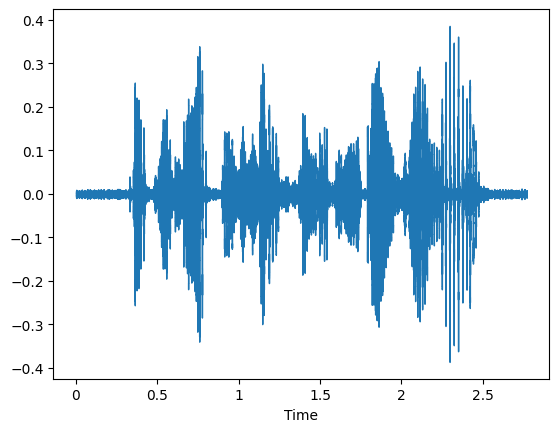

Reference text: it will not be safe for you to stay here now
ESPnet: it will not be safe for you to stay here now
ESPnet's wer: 0.0
Whisper: it will not be safe for you to stay here now.
Detected language: en
whisper's wer: 9.090909090909092
whisper's wer without dot: 0.0
**************************************************


/net/papilio/storage6/phusaeng/anaconda3/envs/pytorch2/lib/python3.10/site-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(


Input Speech: ESPNet_asr_egs/en/2.wav


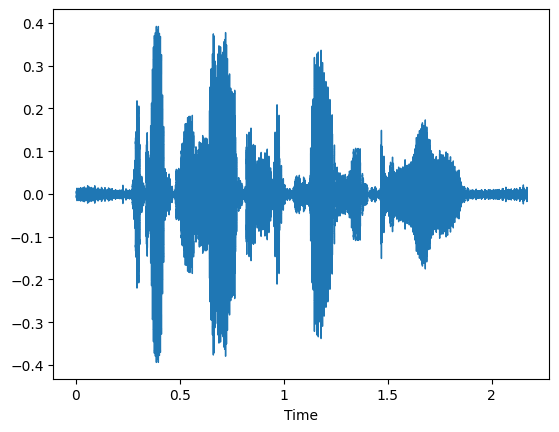

Reference text: it will be no disappointment to me
ESPnet: it will be no disappointment to me
ESPnet's wer: 0.0
Whisper: it'll be no disappointment to me.
Detected language: en
whisper's wer: 42.857142857142854
whisper's wer without dot: 28.57142857142857
**************************************************
Input Speech: ESPNet_asr_egs/en/3.wav


/net/papilio/storage6/phusaeng/anaconda3/envs/pytorch2/lib/python3.10/site-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(


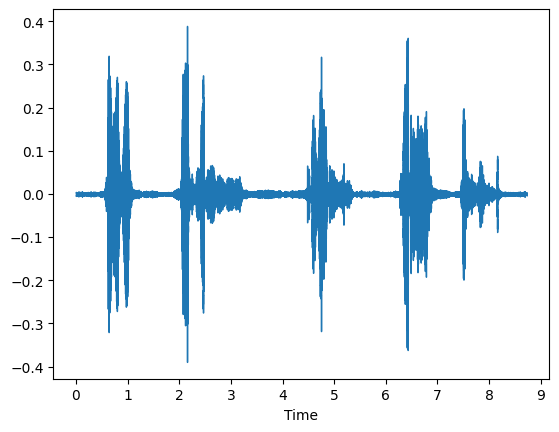

Reference text: however that was over now the tree gone the story at an end
ESPnet: however that was over now the tree on the story had an end
ESPnet's wer: 15.384615384615385
Whisper: however, that was over now. the tree gone. the story had an end.
Detected language: en
whisper's wer: 38.46153846153847
whisper's wer without dot: 15.384615384615385
**************************************************


/net/papilio/storage6/phusaeng/anaconda3/envs/pytorch2/lib/python3.10/site-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(


Input Speech: ESPNet_asr_egs/en/4.wav


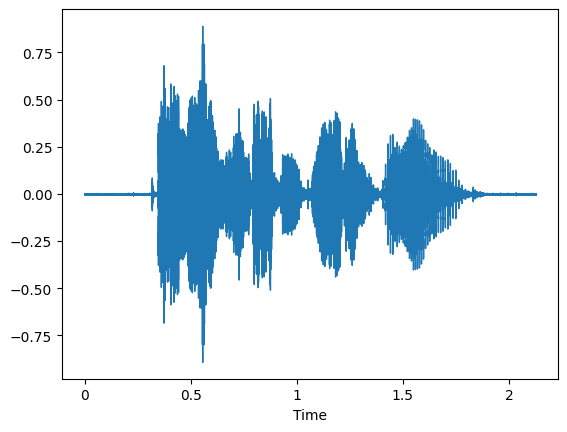

Reference text: all is said without a word
ESPnet: all is said without a word
ESPnet's wer: 0.0
Whisper: all is said without a word.
Detected language: en
whisper's wer: 16.666666666666664
whisper's wer without dot: 0.0
**************************************************


/net/papilio/storage6/phusaeng/anaconda3/envs/pytorch2/lib/python3.10/site-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(


Input Speech: ESPNet_asr_egs/en/5.wav


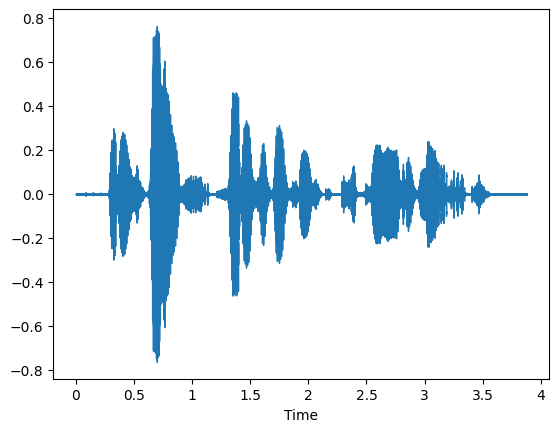

Reference text: it is this that is of interest to theory of knowledge
ESPnet: it is this that is of interest to theory of knowledge
ESPnet's wer: 0.0
Whisper: it is this that is of interest to theory of knowledge.
Detected language: en
whisper's wer: 9.090909090909092
whisper's wer without dot: 0.0
**************************************************


In [35]:
import pandas as pd
import soundfile
import librosa.display
from IPython.display import display, Audio
from evaluate import load
import matplotlib.pyplot as plt
import whisper


model = whisper.load_model("base")
wer = load('wer')

egs = pd.read_csv("ESPNet_asr_egs/egs.csv")

for index, row in egs.iterrows():
  if row["lang"] == lang or lang == "multilingual":
    wav_path = "ESPNet_asr_egs/" + row["path"]
    speech, rate = soundfile.read(wav_path)
    assert fs == int(row["sr"])
    nbests = speech2text(speech)

    text, *_ = nbests[0]
    print(f"Input Speech: ESPNet_asr_egs/{row['path']}")
    # let us listen to samples
    display(Audio(speech, rate=rate))
    # librosa.display.waveplot(speech, sr=rate)
    librosa.display.waveshow(speech, sr=rate)
    plt.show()
    gt = text_normalizer(row['text']).lower()
    print(f"Reference text: {gt}")
    # print(f"ASR hypothesis: {text_normalizer(text)}")
    espnet_text = text_normalizer(text).lower()
    print(f"ESPnet: {espnet_text}")
    print(f"ESPnet's wer: {100 * wer.compute(references=[gt], predictions=[espnet_text])}")
    # load audio and pad/trim it to fit 30 seconds
    audio = whisper.load_audio(wav_path)
    audio = whisper.pad_or_trim(audio)

    # make log-Mel spectrogram and move to the same device as the model
    mel = whisper.log_mel_spectrogram(audio).to(model.device)

    # detect the spoken language
    _, probs = model.detect_language(mel)
    
    # decode the audio
    options = whisper.DecodingOptions()
    result = whisper.decode(model, mel, options)
    whisper_text = result.text.lower()
    whisper_text_nodot = whisper_text.replace(".", "")
    # type of the text
    # print the recognized text
    print(f"Whisper: {whisper_text}")
    print(f"Detected language: {max(probs, key=probs.get)}")
    print(f"whisper's wer: {100 * wer.compute(references=[gt], predictions=[whisper_text])}")
    print(f"whisper's wer without dot: {100 * wer.compute(references=[gt], predictions=[whisper_text_nodot])}")


    print("*" * 50)

In [21]:
gt, espnet_text,  whisper_text

('IT IS THIS THAT IS OF INTEREST TO THEORY OF KNOWLEDGE',
 'IT IS THIS THAT IS OF INTEREST TO THEORY OF KNOWLEDGE',
 'It is this that is of interest to theory of knowledge.')

In [28]:
score_espnet = wer.compute(references=[gt.lower()], predictions=[espnet_text.lower()])
score_whisper = wer.compute(references=[gt.lower()], predictions=[whisper_text.lower()])
print(f'score espnet: {score_espnet}')
print(f'score whisper: {score_whisper}')
print(f'Reference: {gt.lower()}')
print(f'ESPnet: {espnet_text.lower()}')
print(f'Whisper: {whisper_text.lower()}')

score espnet: 0.0
score whisper: 0.09090909090909091
Reference: it is this that is of interest to theory of knowledge
ESPnet: it is this that is of interest to theory of knowledge
Whisper: it is this that is of interest to theory of knowledge.


In [25]:
espnet_text.lower(), whisper_text.lower()

('it is this that is of interest to theory of knowledge',
 'it is this that is of interest to theory of knowledge.')

In [18]:
predictions = ["hello world"]
references = ["hello o as;kfsa a worlddd"]
wer_score = wer.compute(predictions=predictions, references=references)
print(wer_score)

0.8


In [57]:
en2de = torch.hub.load('pytorch/fairseq', 'transformer.wmt19.en-de.single_model')
en2de.translate('Hello world', beam=5)
# 'Hallo Welt'

Using cache found in /home/tslab/phusaeng/.cache/torch/hub/pytorch_fairseq_main
INFO:fairseq.file_utils:loading archive file https://dl.fbaipublicfiles.com/fairseq/models/wmt19.en-de.joined-dict.single_model.tar.gz from cache at /home/tslab/phusaeng/.cache/torch/pytorch_fairseq/81a0be5cbbf1c106320ef94681844d4594031c94c16b0475be11faa5a5120c48.63b093d59e7e0814ff799bb965ed4cbde30200b8c93a44bf8c1e5e98f5c54db3
INFO:fairseq.file_utils:extracting archive file /home/tslab/phusaeng/.cache/torch/pytorch_fairseq/81a0be5cbbf1c106320ef94681844d4594031c94c16b0475be11faa5a5120c48.63b093d59e7e0814ff799bb965ed4cbde30200b8c93a44bf8c1e5e98f5c54db3 to temp dir /tmp/tmpejqxq36y


Error: [('/tmp/tmpejqxq36y/wmt19.en-de.joined-dict.single_model/model.pt', '/home/tslab/phusaeng/.cache/torch/pytorch_fairseq/81a0be5cbbf1c106320ef94681844d4594031c94c16b0475be11faa5a5120c48.63b093d59e7e0814ff799bb965ed4cbde30200b8c93a44bf8c1e5e98f5c54db3/model.pt', '[Errno 28] No space left on device')]

In [44]:
chkpt = torch.load('./weight/librispeech_transformer_m.pt')
model = chkpt['model']

In [56]:

chkpt

{'args': Namespace(no_progress_bar=False, log_interval=50, log_format='simple', tensorboard_logdir='/checkpoint/changhan/tensorboard_logs/2020-10-19/ls.task_asr_unigram10000.ls_0.1.cfg_config_ld.max_tok_40000.share_dec_in_out_emb.lr_0.001.wu_10000.arch_s2t_transformer_m.ngpu8', seed=1, cpu=False, tpu=False, bf16=False, memory_efficient_bf16=False, fp16=True, memory_efficient_fp16=False, fp16_no_flatten_grads=False, fp16_init_scale=128, fp16_scale_window=None, fp16_scale_tolerance=0.0, min_loss_scale=0.0001, threshold_loss_scale=None, user_dir=None, empty_cache_freq=0, all_gather_list_size=16384, model_parallel_size=1, checkpoint_suffix='', checkpoint_shard_count=1, quantization_config_path=None, profile=False, criterion='label_smoothed_cross_entropy', tokenizer=None, bpe=None, optimizer='adam', lr_scheduler='inverse_sqrt', scoring='bleu', task='speech_to_text', num_workers=8, skip_invalid_size_inputs_valid_test=False, max_tokens=40000, batch_size=None, required_batch_size_multiple=8, r